In [1]:
import sys

try:
    import matplotlib.pyplot as plt
    import qutip

except ImportError:
    print("Tools not found, installing. Please restart your kernel after this is done.")
    !{sys.executable} -m pip install qutip\>=5 matplotlib\>=3.5
    print("\nNew libraries have been installed. Please restart your kernel!")

Tools not found, installing. Please restart your kernel after this is done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.4/28.4 MB 13.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

New libraries have been installed. Please restart your kernel!


In [2]:
import cudaq
import numpy as np

## Retry the subsequent cells by setting the target to density matrix simulator.
# cudaq.set_target("density-matrix-cpu")


@cudaq.kernel
def kernel(angles: np.ndarray):
    qubit = cudaq.qubit()
    rz(angles[0], qubit)
    rx(angles[1], qubit)
    rz(angles[2], qubit)

/pscratch/sd/g/gzquse/cudaq/lib/python3.10/site-packages/cupy/_environment.py:541: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environment:

    cupy, cupy-cuda12x

  Follow these steps to resolve this issue:

    1. For all packages listed above, run the following command to remove all
       existing CuPy installations:

         $ pip uninstall <package_name>

      If you previously installed CuPy via conda, also run the following:

         $ conda uninstall cupy

    2. Install the appropriate CuPy package.
       Refer to the Installation Guide for detailed instructions.

         https://docs.cupy.dev/en/stable/install.html

--------------------------------------------------------------------------------

  warnings.warn(f'''


In [3]:
rng = np.random.default_rng(seed=11)
blochSphereList = []
for _ in range(4):
    angleList = rng.random(3) * 2 * np.pi
    sph = cudaq.add_to_bloch_sphere(cudaq.get_state(kernel, angleList))
    blochSphereList.append(sph)

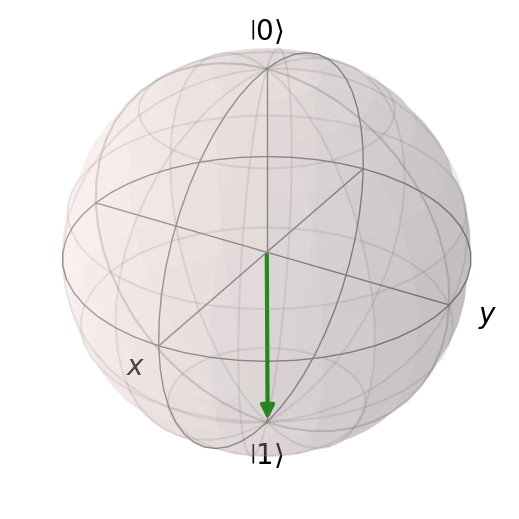

In [4]:
cudaq.show(blochSphereList[0])

In [8]:
import qutip

rng = np.random.default_rng(seed=47)
blochSphere = qutip.Bloch()
for _ in range(10):
    angleList = rng.random(3) * 2 * np.pi
    sph = cudaq.add_to_bloch_sphere(cudaq.get_state(kernel, angleList), blochSphere)

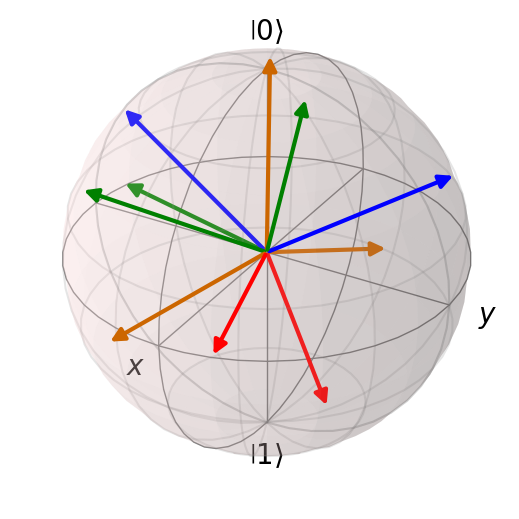

In [9]:
blochSphere.show()

In [11]:
@cudaq.kernel
def kernel_to_draw():
    q = cudaq.qvector(4)
    h(q)
    x.ctrl(q[0], q[1])
    y.ctrl([q[0], q[1]], q[2])
    z(q[2])

    swap(q[0], q[1])
    swap(q[0], q[3])
    swap(q[1], q[2])

    r1(3.14159, q[0])
    tdg(q[1])
    s(q[2])

In [12]:
print(cudaq.draw('latex', kernel_to_draw))

\documentclass{minimal}
\usepackage{quantikz}
\begin{document}
\begin{quantikz}
  \lstick{$q_0$} & \gate{H} & \ctrl{1} & \ctrl{2} & \swap{1} & \swap{3} & \gate{R_1(3.142)} & \qw & \qw \\
  \lstick{$q_1$} & \gate{H} & \gate{X} & \ctrl{1} & \targX{} & \qw & \swap{1} & \gate{T^\dag} & \qw \\
  \lstick{$q_2$} & \gate{H} & \qw & \gate{Y} & \gate{Z} & \qw & \targX{} & \gate{S} & \qw \\
  \lstick{$q_3$} & \gate{H} & \qw & \qw & \qw & \targX{} & \qw & \qw & \qw \\
\end{quantikz}
\end{document}

